In [1]:
%run ChartsCommon.ipynb
import matplotlib.colors as mcolors

In [6]:
# this notebook is correct!

In [25]:


def plotFamilies(plot_df_given, percentage):
    # Filter data
    algosCorrectNames = ['MeDiH-BL', 'MeDiH-BLC', 'MeDiH-MM']
    internal_df = plot_df_given[(plot_df_given['relation'] == 'internal') & (plot_df_given['algorithm'].isin(algosCorrectNames))]
    
    #print(internal_df[(internal_df['algorithm']=='MeDiH-BLC') & (internal_df['family']=='methylseq')
    #                 & (internal_df['ratio']>1)
    #                 ])
    
    # Group by algorithm, family, size and average ratio
   # grouped = internal_df.groupby(['algorithm', 'family', 'size'], as_index=False)['ratio'].mean()
    grouped = internal_df.groupby(['algorithm', 'family', 'size'], as_index=False).agg({'ratio': gmean})

    # Get unique families and base colors
    families = grouped['family'].unique()
    base_palette = dict(zip(families, sns.color_palette("tab10", n_colors=len(families))))

    # Function to darken a color (reduce lightness)
    def darken_color(color, amount=0.6):
        c = mcolors.to_rgb(color)
        return tuple(max(min(x * amount, 1), 0) for x in c)

    # Create a palette mapping (family, algorithm) -> color shade
    algo_shade_map = {
        'MeDiH-BL': 1.0, #1.0,   # base (medium)
        'MeDiH-BLC': 1.0, # 0.8,  # darker
        'MeDiH-MM': 1.0 #0.6    # darkest
    }

    palette = {}
    for family in families:
        base_color = base_palette[family]
        for algo in algosCorrectNames:
            shade = algo_shade_map[algo]
            palette[(family, algo)] = darken_color(base_color, amount=shade)
    
    marker_map = {
        'MeDiH-BL': 'o',   # circle
        'MeDiH-BLC': 's',  # square
        'MeDiH-MM': '^'    # diamond
    }
    linestyle_map = {
    'MeDiH-BL': 'dashdot',      # or '-'
    'MeDiH-BLC': 'dashed',    # or '--'
    'MeDiH-MM': 'dotted',     # or ':'
    }


    # Create a new column combining family and algorithm for plotting
    grouped['fam_algo'] = grouped.apply(lambda row: f"{row['family']} ({row['algorithm']})", axis=1)

    plt.figure(figsize=(24, 12))

    for fam_algo, data in grouped.groupby('fam_algo'):
        family, algo = fam_algo.split(' (')
        algo = algo[:-1]  # remove trailing ')'
        color = palette[(family, algo)]
        marker = marker_map[algo]
        lnst=linestyle_map[algo]

       # print(fam_algo, data)
        # Plot line
        plt.plot(
            data['size'], data['ratio'], marker=None,
            color=color,
            linewidth=2,
            label=fam_algo,
            linestyle=lnst,
        )

        # Plot larger dots on top
        plt.scatter(
            data['size'], data['ratio'],
            s=120,  # bigger size
            color=color,
            marker=marker,
            edgecolor='black',  # optional: add black edge for better visibility
            linewidth=0.7,
            zorder=5
        )
    baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Equal')
    
    plt.xlabel('Size', fontsize=34)
    plt.ylabel('Self-relative makespan improvement', fontsize=34)
    plt.yticks(fontsize=34)
    plt.xticks(fontsize=34)
    if percentage=="0":
        devtext= "no deviations"
    else:
        devtext = f"deviations {percentage}"    
    #plt.title(f'Makespan of the dynamic version of the algorithm vs its static counterpart,\n by workflow families, {devtext} ', fontsize=34)
    #plt.legend(title='Family (Algorithm)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=18)
    plt.legend(title='Family (Algorithm)', loc='upper right', fontsize=32, title_fontsize=32,  ncol=2)

    plt.tight_layout()
    plt.savefig(f"families-{percentage}-devs.png", dpi=300, bbox_inches='tight')
    plt.show()


./real-exps-correctparams/merged_final/*.txt


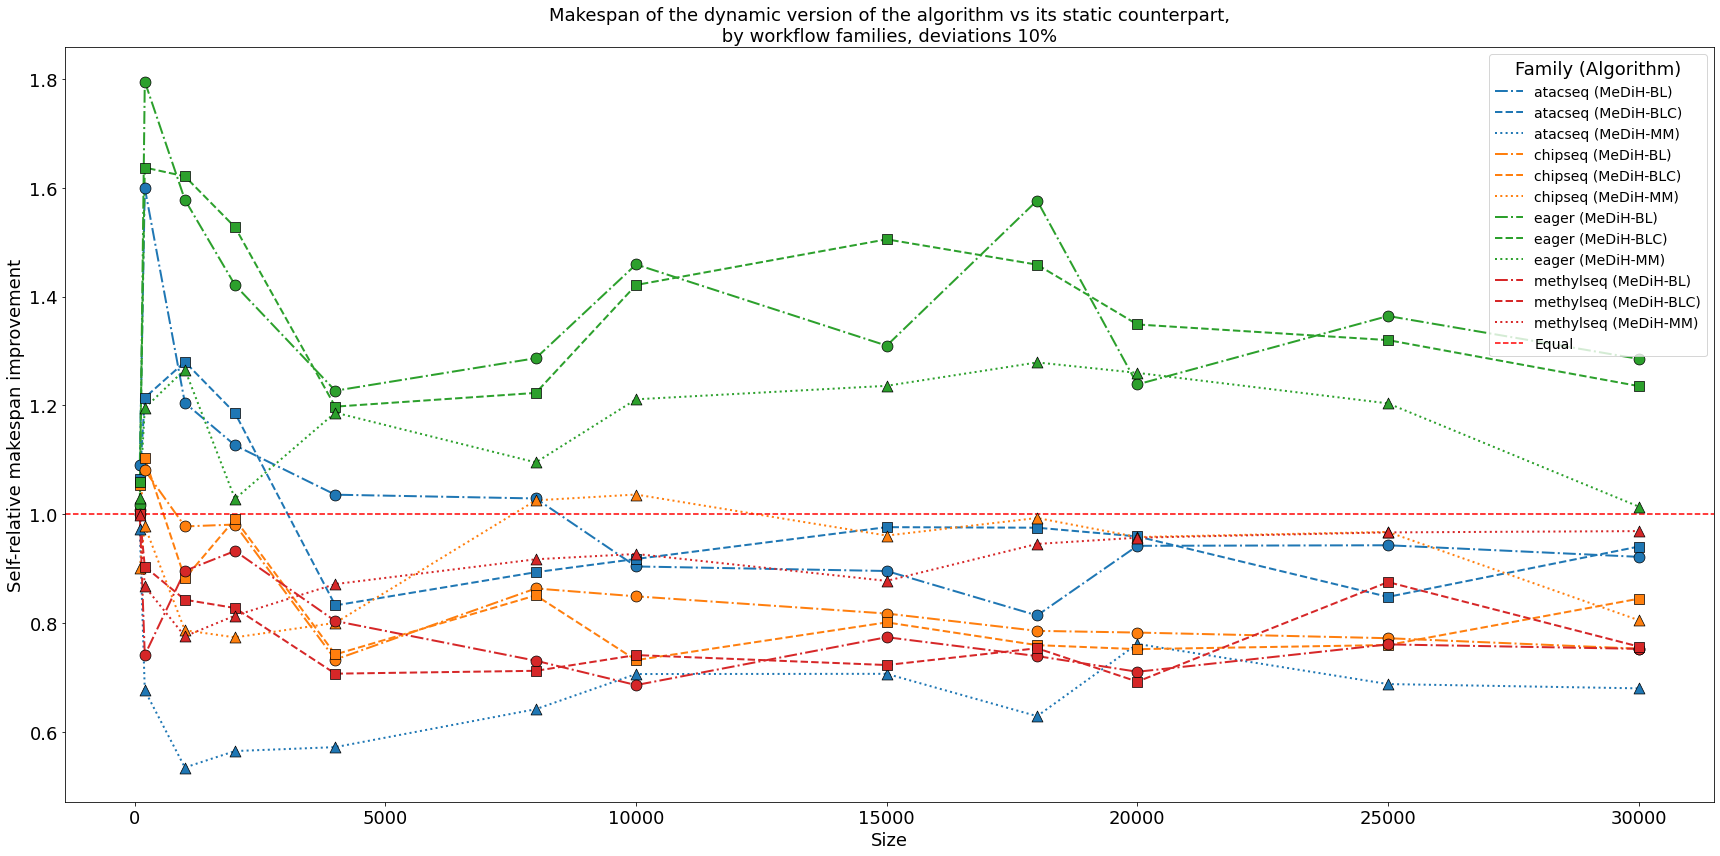

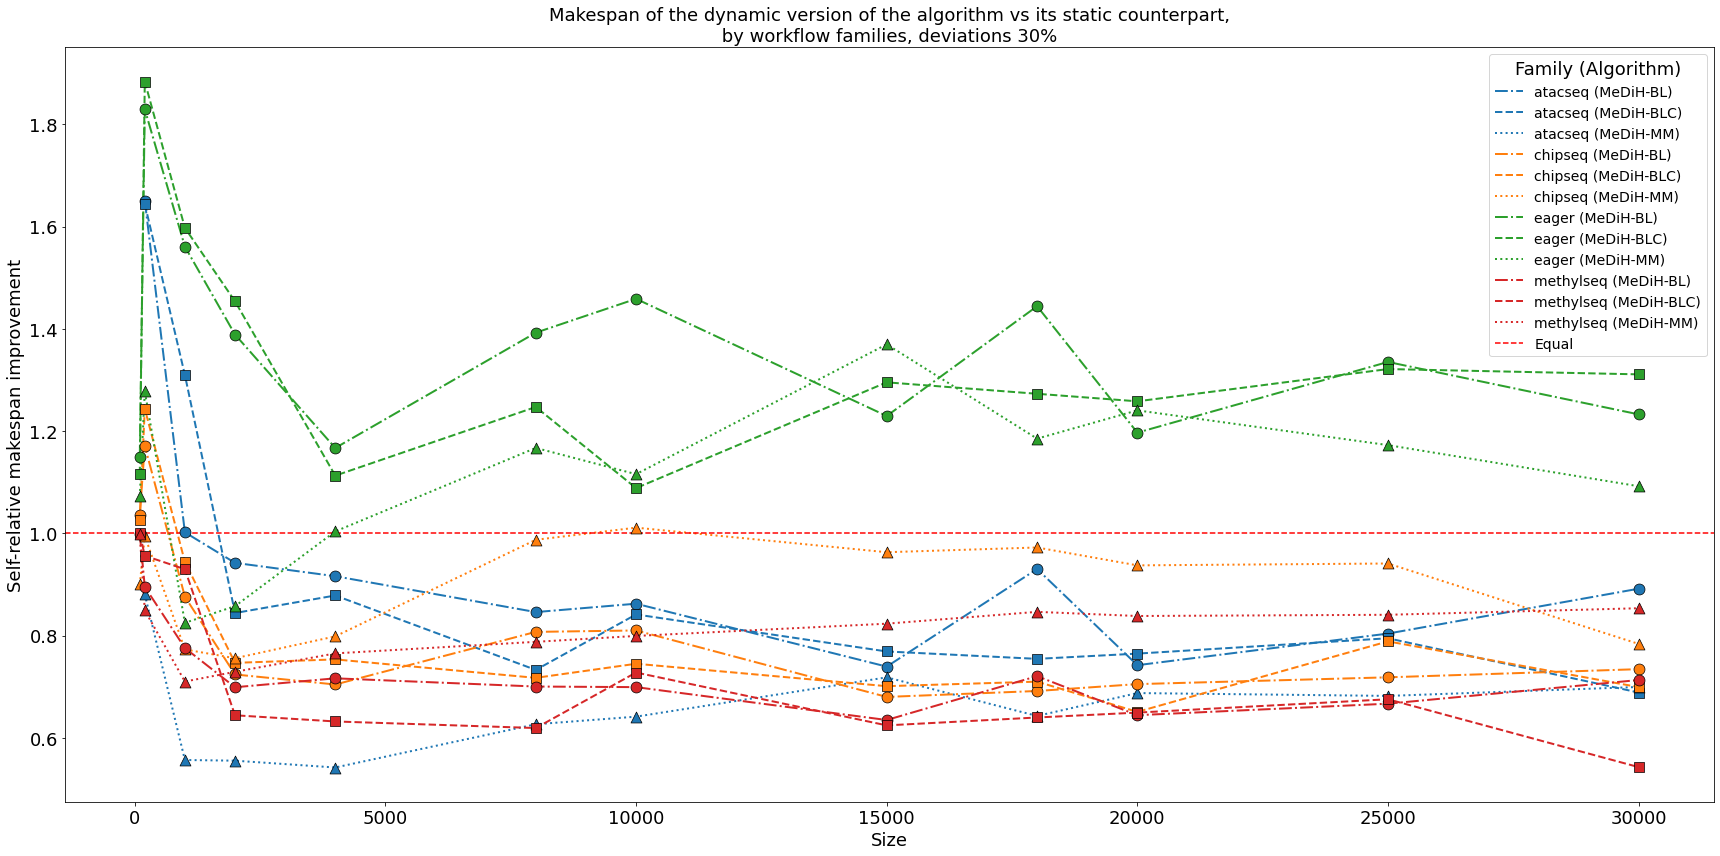

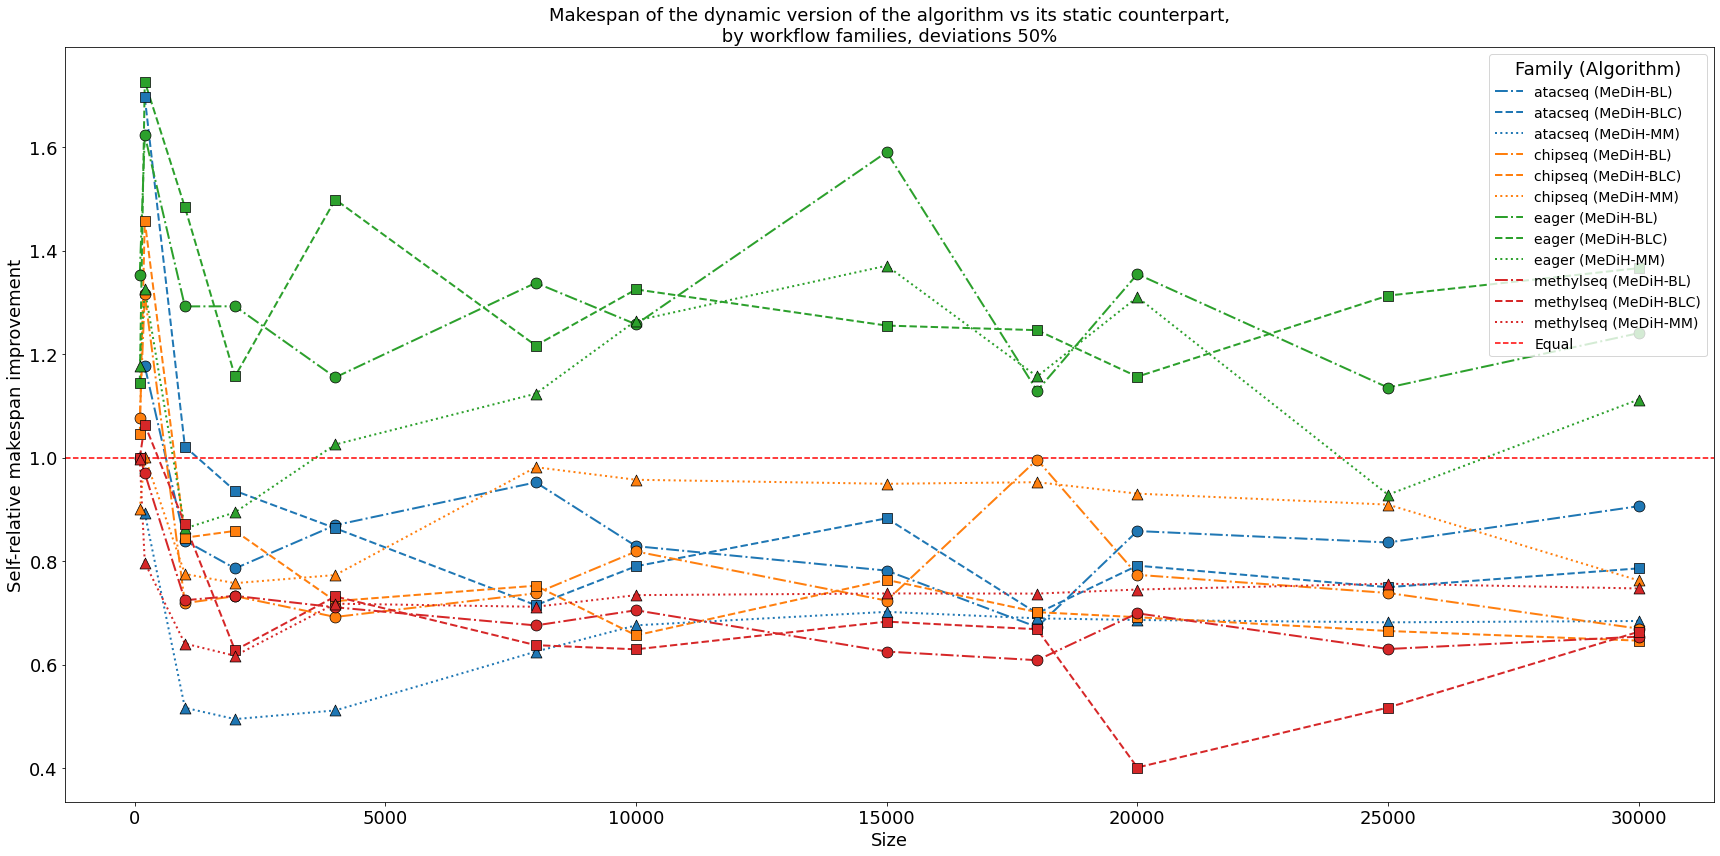

In [12]:
#///////////////////////////////// THIS IS CORRECT /////////////////////////////////
path = "./real-exps-correctparams/merged_final/*.txt"
print(path)

#patterndevs = r'^modified_(BASE|A\d+)_(\d\ddev)'
patterndevs = r'^(BASE|A\d+)-(\d\ddev)'

dfs=read_dfs(path,patterndevs, 2)
#print(dfs)


#dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
labels = ['A1', 'A2', 'A3', 'BASE']
dfsVar1 = [dfs[('A1','10dev')], dfs[('A2','10dev')], dfs[('A3','10dev')], dfs[('BASE','10dev')]]
merged_df_var1 = merge_correct_columns(dfsVar1, labels)
#print(merged_df_var1)
plot_df = buld_plot_df(merged_df_var1)
plot_df["family"]= plot_df['wf_name'].apply(lambda x: x.split('_') [0])
plotFamilies(plot_df, "10%")
#plotDynAndStaticVsBase(plot_df, "deviations 10%", "Makespan improvement over static counterpart ", ['internal'])#['stat_vs_base', 'dyn_vs_base']

dfsVar1 = [dfs[('A1','30dev')], dfs[('A2','30dev')], dfs[('A3','30dev')], dfs[('BASE','30dev')]]
merged_df_var1 = merge_correct_columns(dfsVar1, labels)
#print(merged_df_var1)
plot_df = buld_plot_df(merged_df_var1)
plot_df["family"]= plot_df['wf_name'].apply(lambda x: x.split('_') [0])
plotFamilies(plot_df, "30%")

dfsVar1 = [dfs[('A1','50dev')], dfs[('A2','50dev')], dfs[('A3','50dev')], dfs[('BASE','50dev')]]
merged_df_var1 = merge_correct_columns(dfsVar1, labels)
#print(merged_df_var1)
plot_df = buld_plot_df(merged_df_var1)
plot_df["family"]= plot_df['wf_name'].apply(lambda x: x.split('_') [0])
plotFamilies(plot_df, "50%")

In [17]:
def plotFamiliesByBaseline(plot_df_given, percentage):
    # Filter data
    algosCorrectNames = ['MeDiH-BL', 'MeDiH-BLC', 'MeDiH-MM']
    relations_to_plot = ['stat_vs_base', 'dyn_vs_base']
    internal_df = plot_df_given[
        plot_df_given['relation'].isin(relations_to_plot) & 
        plot_df_given['algorithm'].isin(algosCorrectNames)
    ]
    
    grouped = internal_df.groupby(['relation', 'algorithm', 'family', 'size'], as_index=False).agg({'ratio': gmean})

    # Get unique families and base colors
    families = grouped['family'].unique()
    base_palette = dict(zip(families, sns.color_palette("tab10", n_colors=len(families))))
    
    def adjust_brightness(color, factor):
        #"""Lighten (factor > 1) or darken (factor < 1) an RGB color."""
        c = mcolors.to_rgb(color)
        return tuple(min(max(x * factor, 0), 1) for x in c)

    
    shade_map = {
    'stat_vs_base': 1.0,   # base color (normal)
    'dyn_vs_base': 0.6     # darker version (or use >1.0 for lighter if preferred)
    }


    palette = {}
    for family in families:
        base_color = base_palette[family]
        for algo in algosCorrectNames:
            for relation, shade in shade_map.items():
                shade = shade_map[relation]
                if shade == 1.0:
                    palette[(family, algo, relation)] = base_color
                else:
                    palette[(family, algo, relation)] = adjust_brightness(base_color, factor=shade)

    
    marker_map = {
        'MeDiH-BL': 'o',   # circle
        'MeDiH-BLC': 's',  # square
        'MeDiH-MM': '^'    # diamond
    }
    linestyle_map = {
    'MeDiH-BL': 'dashdot',      # or '-'
    'MeDiH-BLC': 'dashed',    # or '--'
    'MeDiH-MM': 'dotted',     # or ':'
    }


    relation_labels = {'stat_vs_base': 'Static ', 'dyn_vs_base': 'Dyn '}
  

    grouped['label'] = grouped.apply(
    lambda row: f"{row['family']} ({relation_labels[row['relation']]}{row['algorithm']})", axis=1)
    

    ordered_sizes = sorted(grouped['size'].unique())  # numeric order


    plt.figure(figsize=(24, 12))        

    for label, data in grouped.groupby('label'):
        # Parse back
        parts = label.split(' ')
        family = parts[0]
        relation_str = parts[1]
        algo = ' '.join(parts[2:]).strip('()')
        relation = 'dyn_vs_base' if relation_str.startswith('(Dyn') else 'stat_vs_base'
        #print(parts, relation_str, relation, label, "!", algo)
        
        color = palette[(family, algo, relation)]
        label = label.replace("Static ", "")
        label = label.replace("Dyn ", "Dyn")
        
        marker = marker_map[algo]
        lnst = linestyle_map[algo]  # you can keep same linestyle for both stat/dyn if using color difference
        
        
        data = data.sort_values('size')  # <- make sure 100 is first
        #x_values = data['size'].astype(str)  # Equal spacing
        x_values = data['size'].apply(lambda x: ordered_sizes.index(x))  # numeric positions


        #print(label,"!!",data['ratio'], "!!")
        plt.plot(
            x_values, data['ratio'],
            color=color,
            linewidth=2,
            linestyle=lnst,
            label=label,
        )

        plt.scatter(
            x_values, data['ratio'],
            s=120,
            color=color,
            marker=marker,
            edgecolor='black',
            linewidth=0.9,
            zorder=5
        )         
      

    '''plt.figure(figsize=(24, 12))

    sns.barplot(
        data=grouped,
        x='size',
        y='ratio',
        hue='label',
       # palette=palette,  # your custom color mapping
        palette='muted',
        ci=None
    ) '''


    
    plt.xlabel('Workflow size', fontsize=36)
    plt.ylabel('Makespan improvement against baseline', fontsize=36)
    plt.yticks(fontsize=36)
    plt.yscale("log") 
    plt.xticks(
    ticks=range(len(ordered_sizes)),
    labels=[str(s) for s in ordered_sizes],
    fontsize=36
    )
    
    if percentage=="0":
        devtext = "no deviations"
    else:
        devtext = f"devations {percentage}"
   # plt.title(f'Makespan of the dynamic version of the algorithm vs its static counterpart,\n by workflow families, {devtext}', fontsize=36)
   
   # plt.legend(title='Family (Algorithm)', loc='lower right', fontsize=20, title_fontsize=22)
    plt.legend(
    title='Family (Algorithm)',
    loc='lower right',
   # bbox_to_anchor=(0.5, -0.25),  # Move it below the plot
    ncol=3,                       # Two columns
    fontsize=24,
    title_fontsize=30
    #,frameon=False                 # Optional: no legend box border
    )
   
    plt.tight_layout()
    plt.savefig(f"families-{percentage}-vsbaseline.png", dpi=300, bbox_inches='tight')
    plt.show()


./real-exps-correctparams/merged_final/*.txt


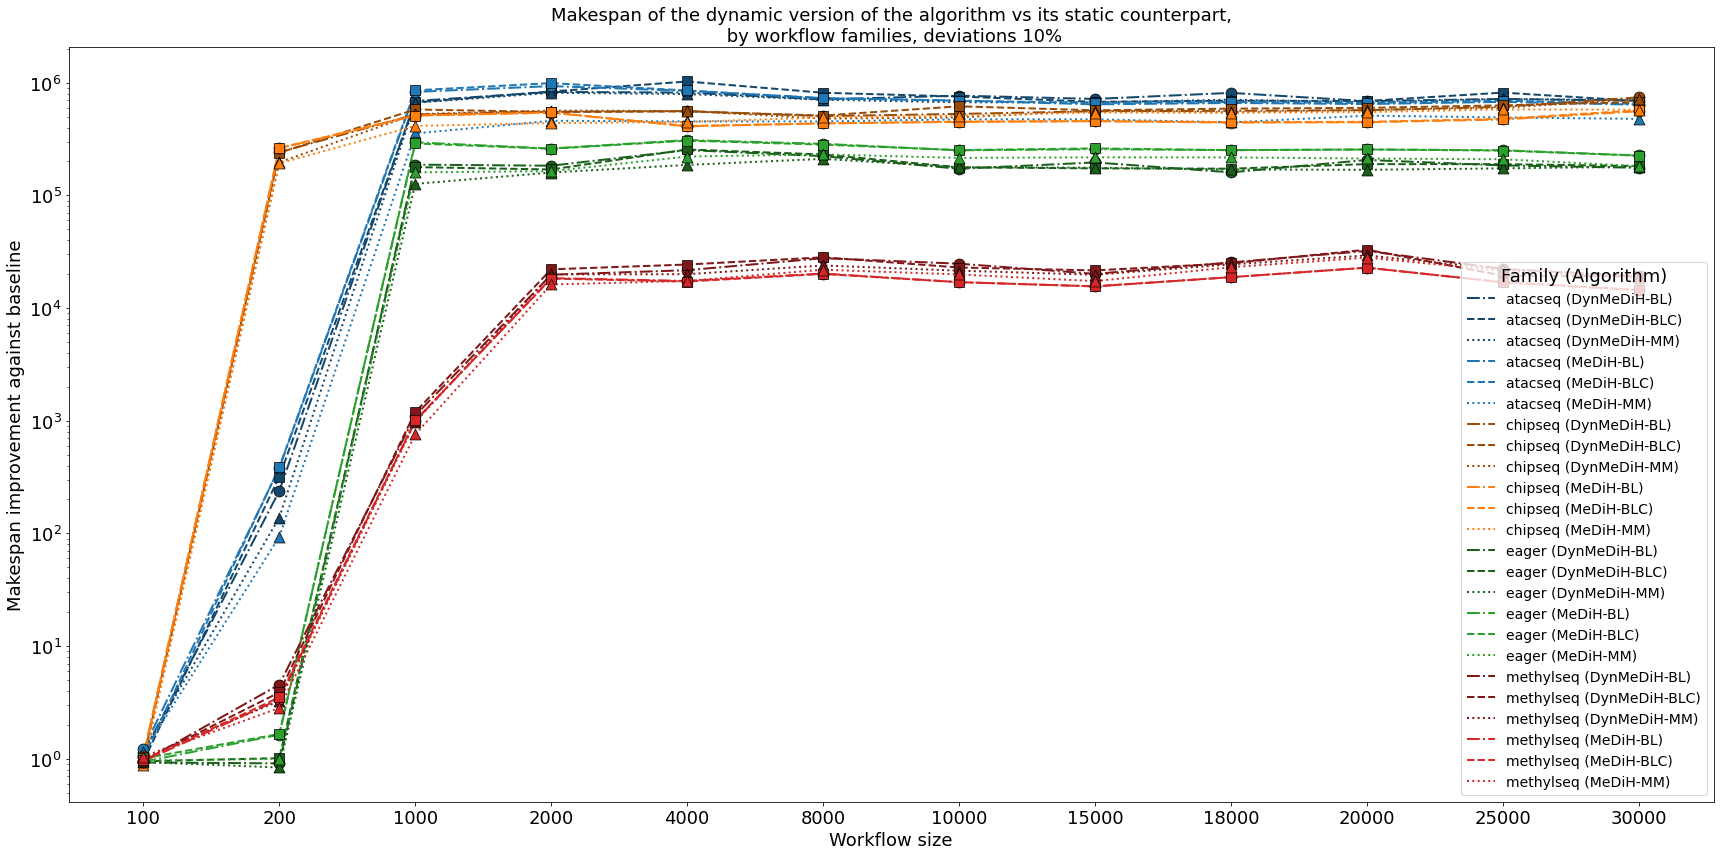

In [18]:
path = "./real-exps-correctparams/merged_final/*.txt"
print(path)

#patterndevs = r'^modified_(BASE|A\d+)_(\d\ddev)'
patterndevs = r'^(BASE|A\d+)-(\d\ddev)'

dfs=read_dfs(path,patterndevs, 2)
#print(dfs)

#dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
labels = ['A1', 'A2', 'A3', 'BASE']
dfsVar1 = [dfs[('A1','10dev')], dfs[('A2','10dev')], dfs[('A3','10dev')], dfs[('BASE','10dev')]]
merged_df_var1 = merge_correct_columns(dfsVar1, labels)

#print(merged_df_var1)
#print(merged_df_var1[merged_df_var1['wf_name']=="atacseq"])
#print(merged_df_var1[merged_df_var1["size"]==100].to_string())
plot_df = buld_plot_df(merged_df_var1)
plot_df["family"]= plot_df['wf_name'].apply(lambda x: x.split('_') [0])
#print(plot_df[plot_df["size"]==200].to_string())
plotFamiliesByBaseline(plot_df, "10%")

#barplot??

#gegenüberstellen mit anderem offload penalty


In [54]:
path = "./results-13-07/merged_final/10pw3/*.txt"
print(path)

patterndevs = r'^(BASE|A\d+)-(\d\ddev)'

dfs=read_dfs(path,patterndevs, 2)
labels = ['A1', 'A2', 'A3', 'BASE']

dfsVar1 = [dfs[('A1','50dev')], dfs[('A2','50dev')], dfs[('A3','50dev')], dfs[('BASE','50dev')]]
merged_df_var1 = merge_correct_columns(dfsVar1, labels)
#print(merged_df_var1)
plot_df = buld_plot_df(merged_df_var1)
plot_df["family"]= plot_df['wf_name'].apply(lambda x: x.split('_') [0])
plotFamilies(plot_df, "50%")

./results-13-07/merged_final/10pw3/*.txt


NameError: name 'plotFamilies' is not defined

./results-13-07/nodevs/merged/*.txt


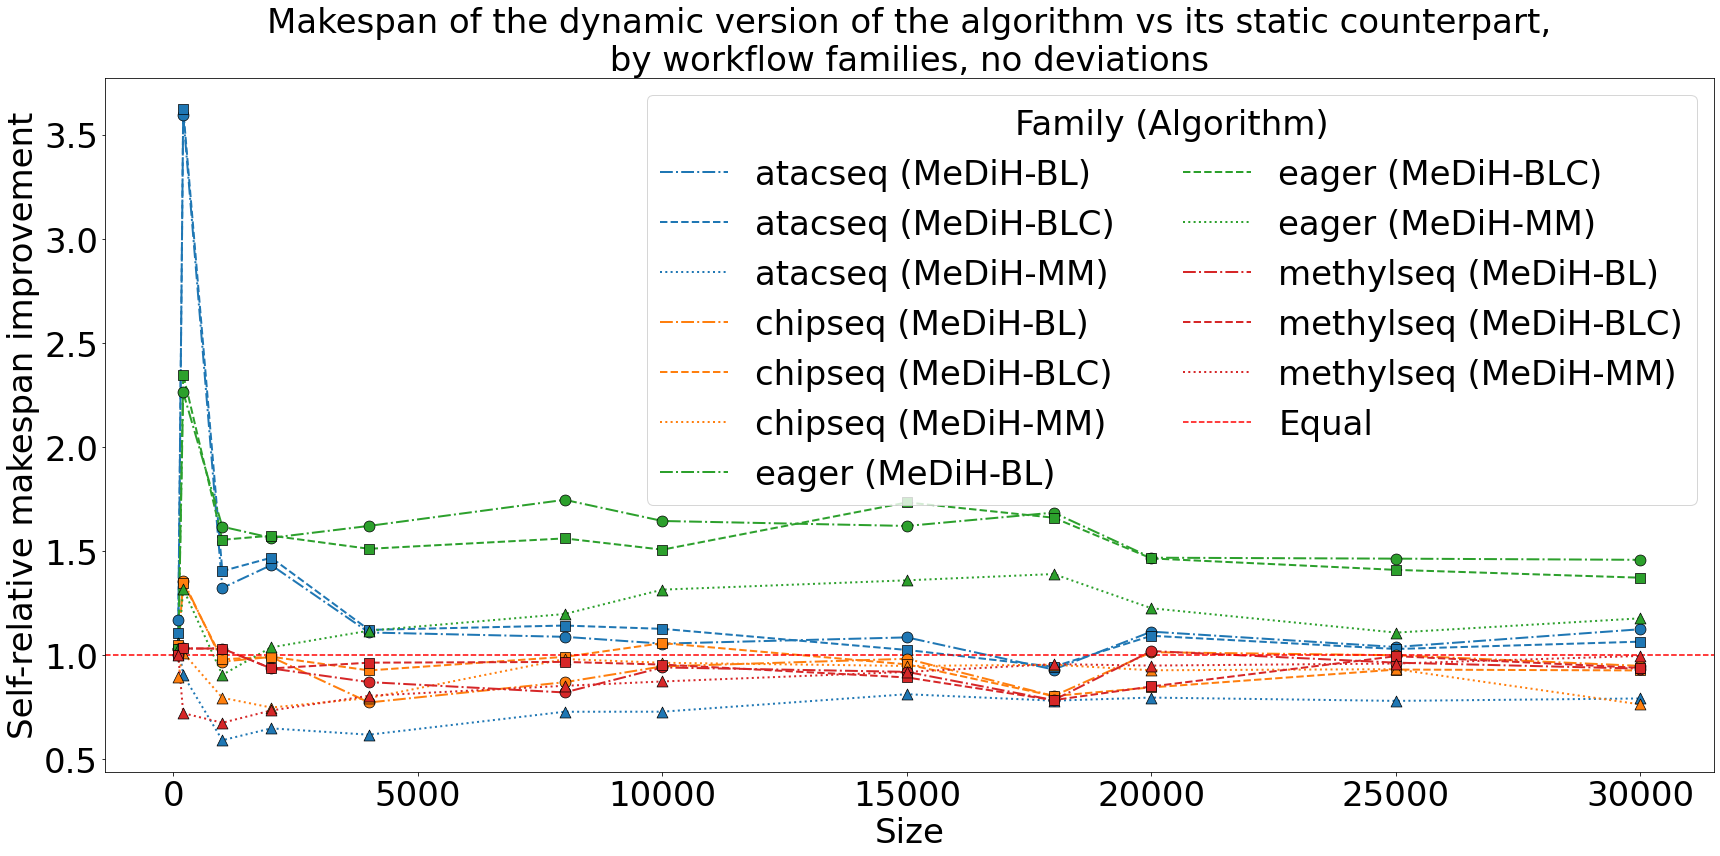

In [17]:
path = "./results-13-07/nodevs/merged/*.txt"
print(path)

patterndevs = r'^(BASE|A\d+)-(ndev)'

dfs=read_dfs(path,patterndevs, 2)
labels = ['A1', 'A2', 'A3', 'BASE']

dfsVar1 = [dfs[('A1','ndev')], dfs[('A2','ndev')], dfs[('A3','ndev')], dfs[('BASE','ndev')]]
merged_df_var1 = merge_correct_columns(dfsVar1, labels)
#print(merged_df_var1)
plot_df = buld_plot_df(merged_df_var1)
plot_df["family"]= plot_df['wf_name'].apply(lambda x: x.split('_') [0])
plotFamilies(plot_df, "0")

./results-13-07/merged_final/10pw3/*.txt


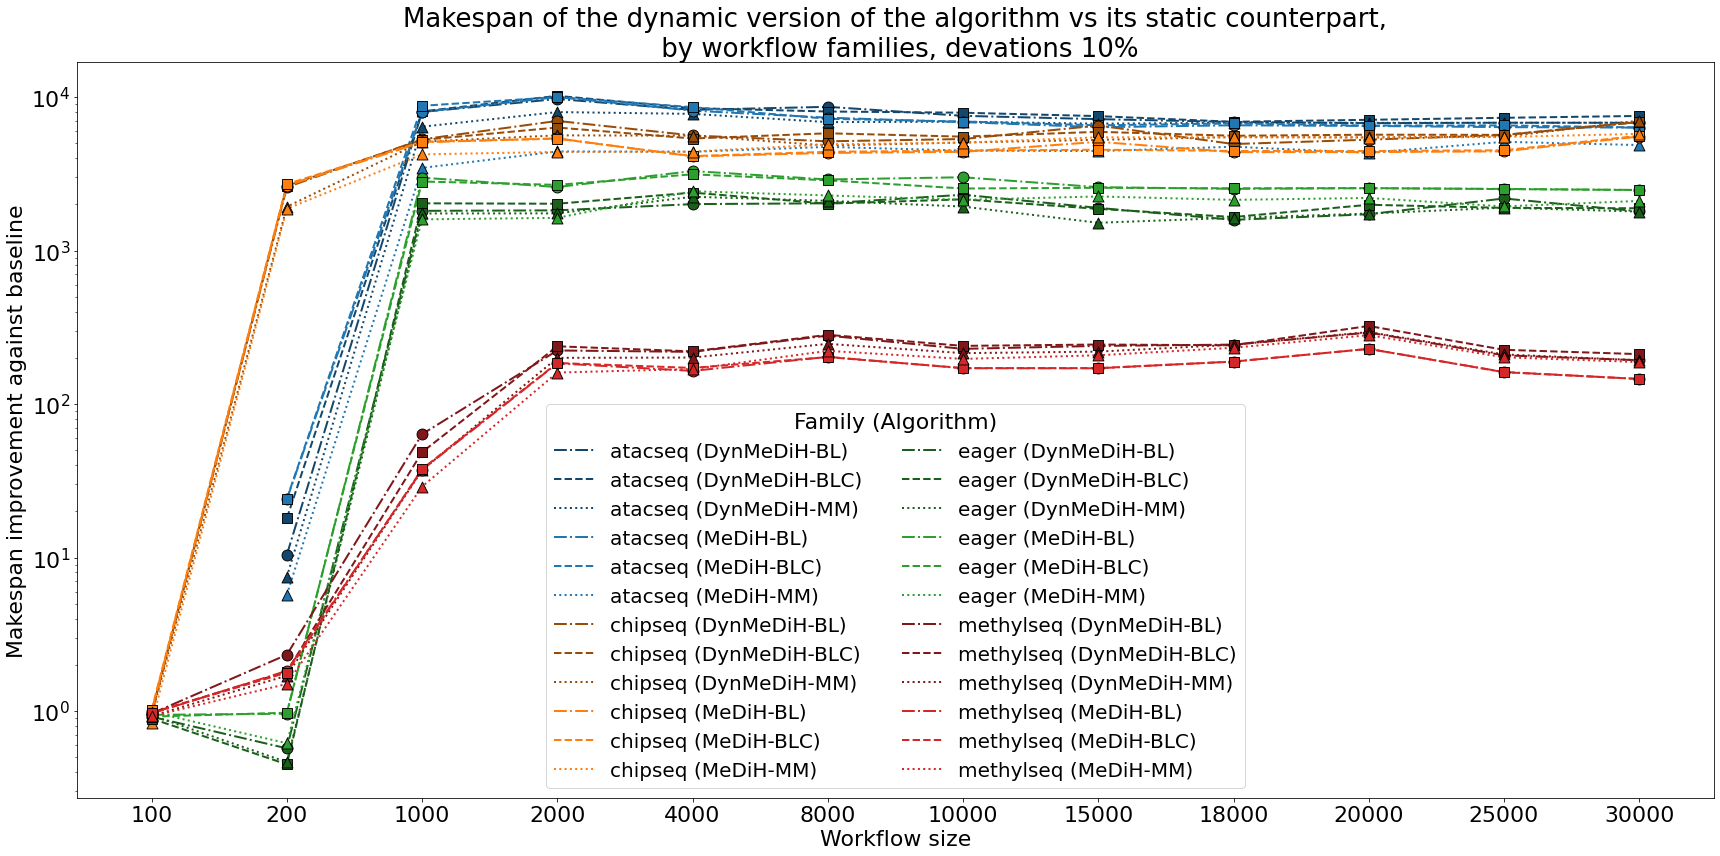

In [63]:
path = "./results-13-07/merged_final/10pw3/*.txt"
print(path)

patterndevs = r'^(BASE|A\d+)-(\d\ddev)'


dfs=read_dfs(path,patterndevs, 2)
#print(dfs)

#dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
labels = ['A1', 'A2', 'A3', 'BASE']
dfsVar1 = [dfs[('A1','10dev')], dfs[('A2','10dev')], dfs[('A3','10dev')], dfs[('BASE','10dev')]]
merged_df_var1 = merge_correct_columns(dfsVar1, labels)

#print(merged_df_var1)
#print(merged_df_var1[merged_df_var1['wf_name']=="atacseq"])
#print(merged_df_var1[merged_df_var1["size"]==100].to_string())
plot_df = buld_plot_df(merged_df_var1)
plot_df["family"]= plot_df['wf_name'].apply(lambda x: x.split('_') [0])
#print(plot_df[plot_df["size"]==200].to_string())
plotFamiliesByBaseline(plot_df, "10%")

#barplot??

#gegenüberstellen mit anderem offload penalty


./results-13-07/nodevs/merged/*.txt


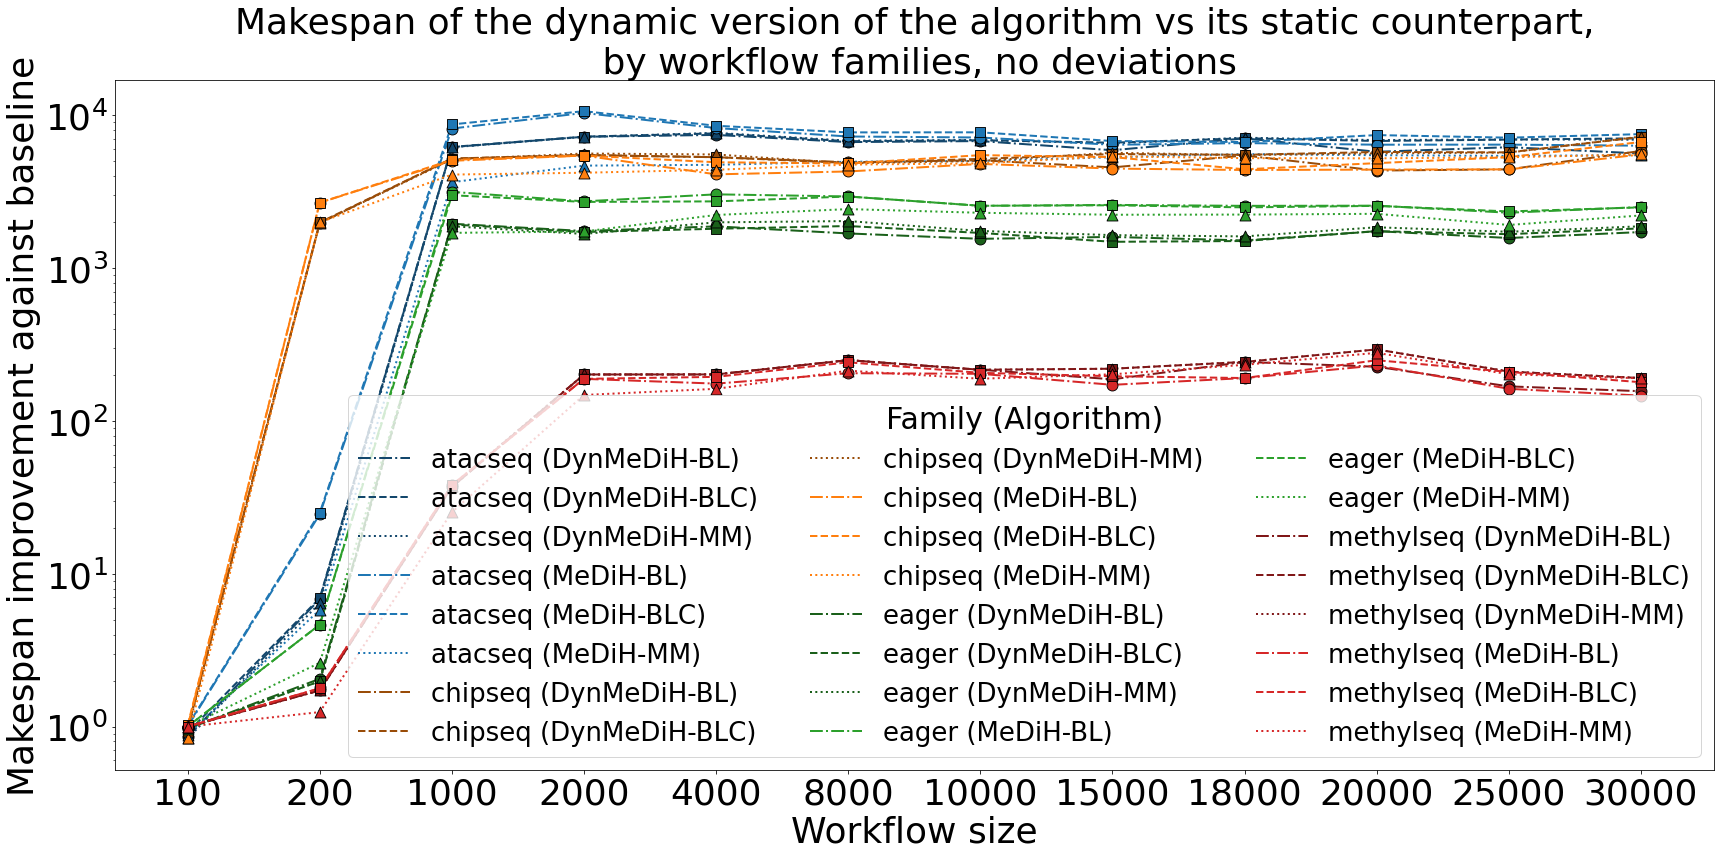

In [16]:
path = "./results-13-07/nodevs/merged/*.txt"
print(path)

patterndevs = r'^(BASE|A\d+)-(ndev)'

dfs=read_dfs(path,patterndevs, 2)

#dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
labels = ['A1', 'A2', 'A3', 'BASE']
dfsVar1 = [dfs[('A1','ndev')], dfs[('A2','ndev')], dfs[('A3','ndev')], dfs[('BASE','ndev')]]


merged_df_var1 = merge_correct_columns(dfsVar1, labels)


#print(merged_df_var1)
#print(merged_df_var1[merged_df_var1['wf_name']=="atacseq"])
#print(merged_df_var1[merged_df_var1["size"]==200].to_string())
plot_df = buld_plot_df(merged_df_var1)
plot_df["family"]= plot_df['wf_name'].apply(lambda x: x.split('_') [0])
#print(plot_df[plot_df["size"]==200].to_string())
plotFamiliesByBaseline(plot_df, "0")

#barplot??

#gegenüberstellen mit anderem offload penalty



./ruben-werte/final-kinda/merged/*.txt
No match found. BASE-50dev.txt
No match found. A1-50dev.txt
No match found. A2-50dev.txt
No match found. BASE-30dev.txt
No match found. A2-10dev.txt
No match found. A1-30dev.txt
No match found. A3-30dev.txt
No match found. BASE-10dev.txt
No match found. A2-30dev.txt
No match found. A3-50dev.txt
No match found. A3-10dev.txt
No match found. A1-10dev.txt
                 wf_name     inp_size       ms_1_A1       ms_2_A1  \
0      atacseq_30000.dot  14091675276  1.591970e+09  1.223367e+09   
1      chipseq_15000.dot  41366257414  3.651630e+09  4.792466e+09   
2    methylseq_15000.dot   6761426956  1.221336e+08  1.459471e+08   
3                  eager  19075314980  3.190311e+06  5.845557e+06   
4         eager_1000.dot  25705994498  2.396858e+07  2.266184e+07   
..                   ...          ...           ...           ...   
248              atacseq   2223941232  1.623410e+06  1.266808e+06   
249              atacseq   3908761308  2.398490e+06  1.

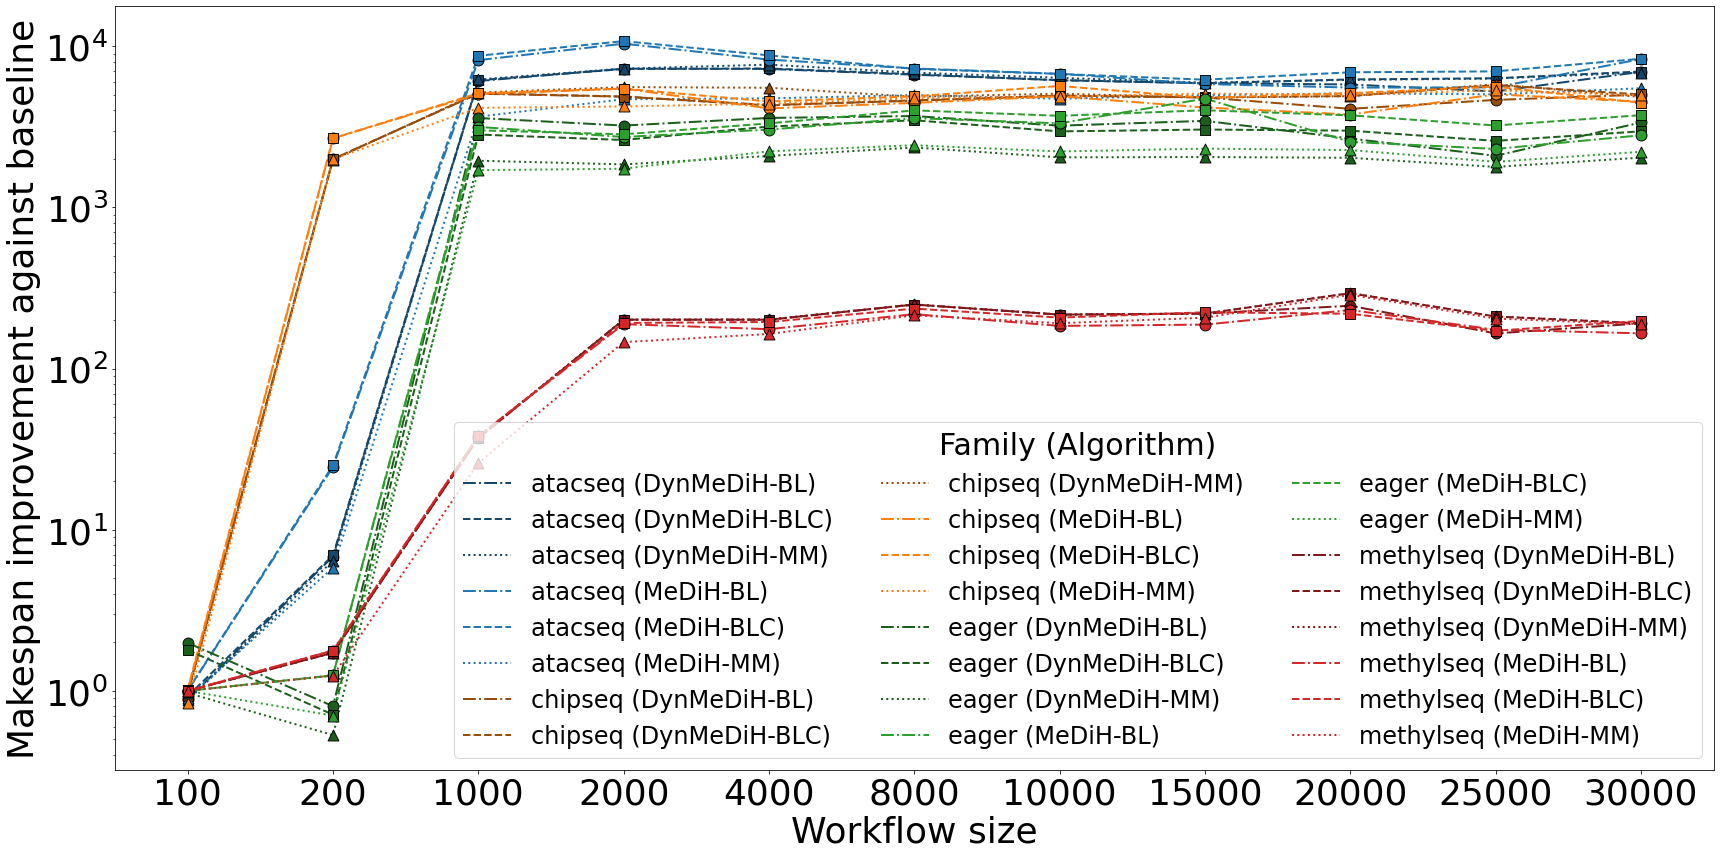

In [18]:
path = "./ruben-werte/final-kinda/merged/*.txt"
print(path)

patterndevs = r'^(BASE|A\d+)-(ndev)'

dfs=read_dfs(path,patterndevs, 2)

#dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
labels = ['A1', 'A2', 'A3', 'BASE']
dfsVar1 = [dfs[('A1','ndev')], dfs[('A2','ndev')], dfs[('A3','ndev')], dfs[('BASE','ndev')]]


merged_df_var1 = merge_correct_columns(dfsVar1, labels)


print(merged_df_var1)
print(merged_df_var1[merged_df_var1['wf_name']=="atacseq"])
#print(merged_df_var1[merged_df_var1["size"]==200].to_string())
plot_df = buld_plot_df(merged_df_var1)
plot_df["family"]= plot_df['wf_name'].apply(lambda x: x.split('_') [0])
#print(plot_df[plot_df["size"]==200].to_string())
plotFamiliesByBaseline(plot_df, "0")

#barplot??

./ruben-werte/final-kinda/merged/*.txt
No match found. BASE-50dev.txt
No match found. A1-50dev.txt
No match found. A2-50dev.txt
No match found. BASE-30dev.txt
No match found. A2-10dev.txt
No match found. A1-30dev.txt
No match found. A3-30dev.txt
No match found. BASE-10dev.txt
No match found. A2-30dev.txt
No match found. A3-50dev.txt
No match found. A3-10dev.txt
No match found. A1-10dev.txt


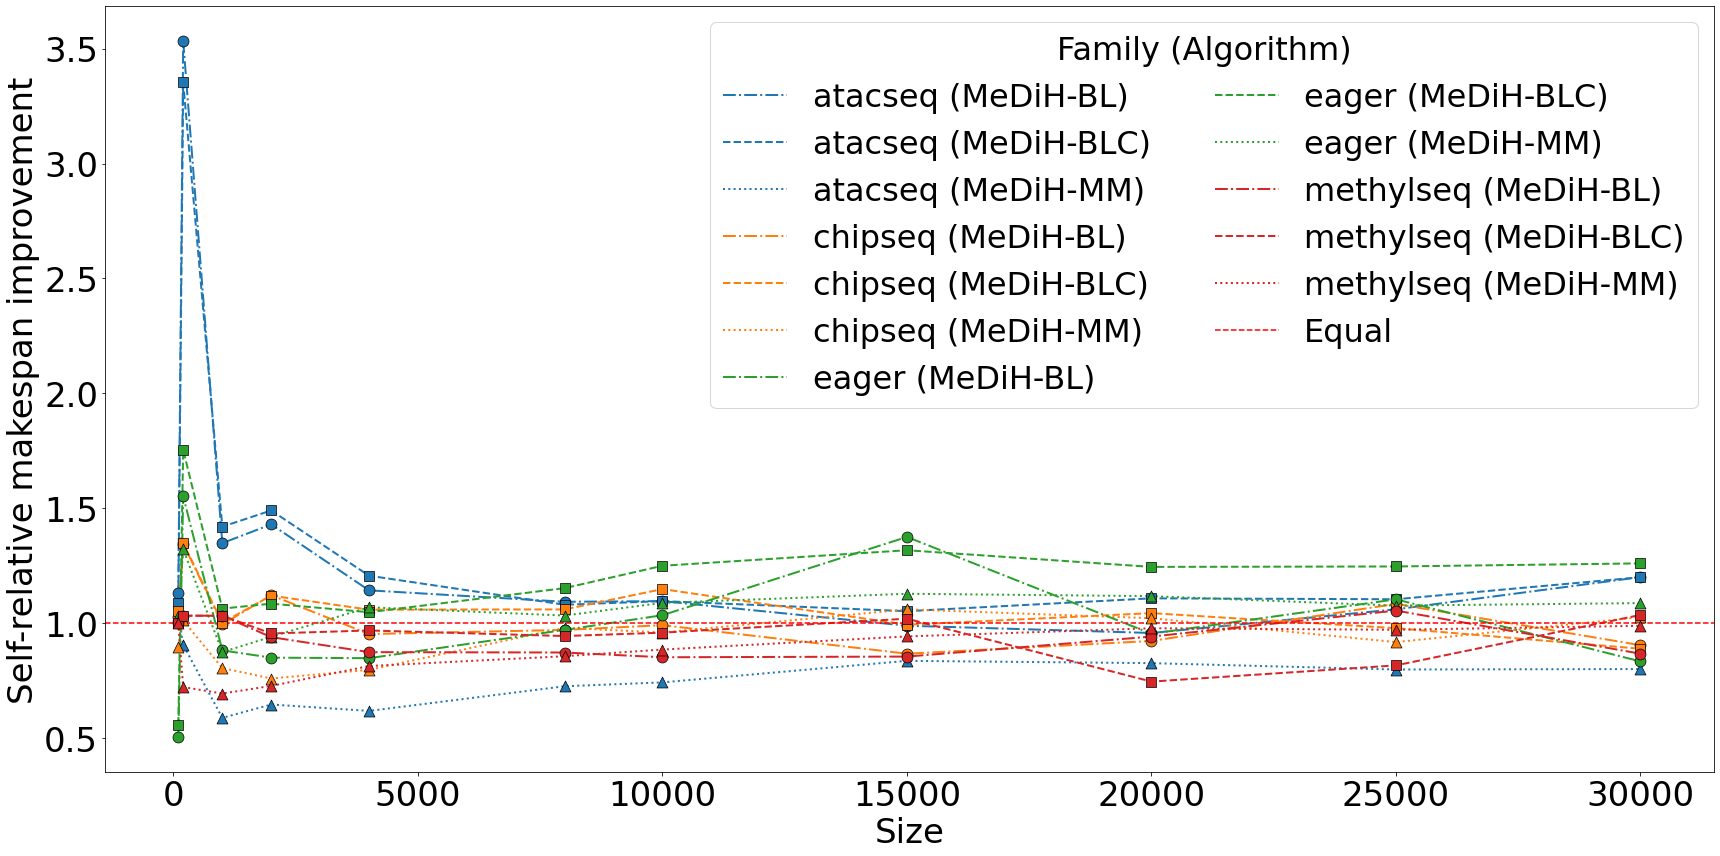

In [26]:
path = "./ruben-werte/final-kinda/merged/*.txt"
print(path)

patterndevs = r'^(BASE|A\d+)-(ndev)'

dfs=read_dfs(path,patterndevs, 2)
labels = ['A1', 'A2', 'A3', 'BASE']

dfsVar1 = [dfs[('A1','ndev')], dfs[('A2','ndev')], dfs[('A3','ndev')], dfs[('BASE','ndev')]]
merged_df_var1 = merge_correct_columns(dfsVar1, labels)
#print(merged_df_var1)
plot_df = buld_plot_df(merged_df_var1)
plot_df["family"]= plot_df['wf_name'].apply(lambda x: x.split('_') [0])
plotFamilies(plot_df, "0")